## Stream functions and stream lines
[<!-- module-gfdocean badge --><span class="module module-gfdocean">Geophysical Fluid Dynamics of the Oceans</span>](module-gfdocean) 
```{index} Stream functions
```
```{index} Stream lines
```

In this notebook, stream functions and streamlines will be explained and visualised.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go

A stream function, $\psi$, is a scalar function of which the derivative gives the velocity field at right angles to the stream function. The stream function is a function of space $(x,y)$ and time and is defined as $\psi = f(x,y)$. 

$$\frac{\partial \psi}{\partial x} = v $$

$$\frac{\partial \psi}{\partial y} = -u $$

where $u(x,y)$ and $v(x,y)$ are velocity component functions.

<p style="text-align:center;"><img src="https://i0.wp.com/theconstructor.org/wp-content/uploads/2020/04/Velocity-Components-Along-Stream-Line.jpg?resize=577%2C206&ssl=1" alt="image info" style= "width: 90%"/></p>


The stream function satisfies the continuity equation and is therefore incompressible. This means that 

$$\nabla (u,v) = \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = \frac{\partial^2 \psi}{\partial x \partial y} + \frac{\partial^2 \psi}{\partial y \partial x}$$

It can be both rotational and irrotational. It is irrotational if it satisfies Laplace's equation of the form 

$$\frac{\partial^2 \psi}{\partial x^2} + \frac{\partial^2 \psi}{\partial y^2} = 0 $$

Streamlines are the lines along which the stream function is constant, so along a streamline $d \psi = 0$. A few properties of streamlines are:
- All the streamlines are parallel to each other
- With a constant stream function value, infinite amounts of streamlines can be drawn

In Python, streamlines can be visualised using the Streamplot within matplotlib that draws the streamlines of a vector field.

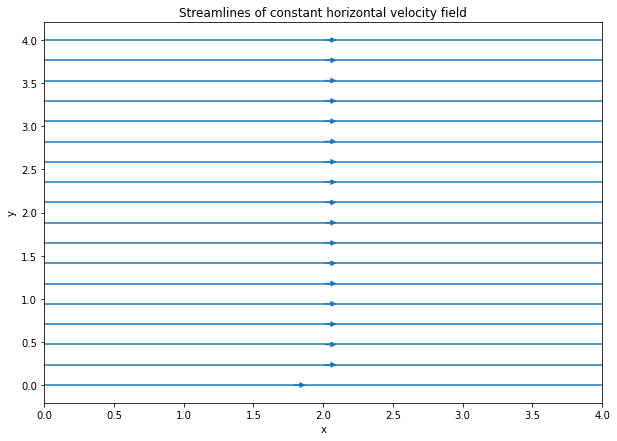

In [2]:
# creating a spatial grid
x = np.arange(0, 5)
y = np.arange(0, 5)
X, Y = np.meshgrid(x, y)

# creating components of the velocity field
u = np.ones((5, 5)) # x-component, zeroes
v = np.zeros((5, 5)) # y-component 
 
fig = plt.figure(figsize = (10, 7))
 
plt.title('Streamlines of constant horizontal velocity field')    
plt.xlabel('x')
plt.ylabel('y')
# Plotting stream plot
# density dictates how closely spaced the streamlines are plotted
plt.streamplot(X, Y, u, v, density = 0.6)

Now, a stream function plot will be made for velocity components that vary within the grid. Now, the x-component of the velocity field, $u$, will be of the function $u = 1-x^2$ and the y-component of the field, $v$, will be defined as $v = x - y^2$.  

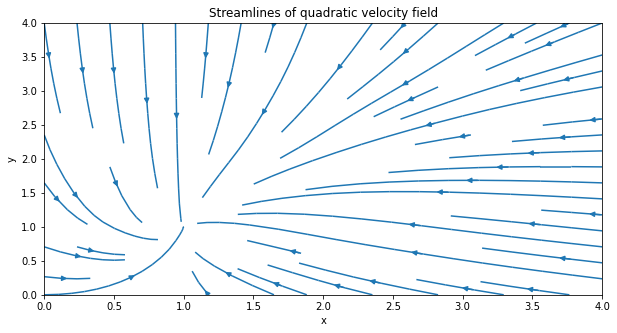

In [3]:
x = np.arange(0, 5)
y = np.arange(0, 5)
X, Y = np.meshgrid(x, y)

U = 1 - X**2
V = X - Y**2
 
fig = plt.figure(figsize = (10, 5))
plt.title('Streamlines of quadratic velocity field')    
plt.xlabel('x')
plt.ylabel('y')
plt.streamplot(X, Y, U, V, density = 0.6)

A more interactive (move cursor over plot to see coordinates) and other good way to create a stream function plot, is by using figure factory from the Plotly module.

Moreover, a source point can be created using Graph_objects from the Plotly module. Below is shown how this can be plotted. Here, the velocity field $u$ and y include the source components in their function.

In [4]:
# create spatial meshgrid
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

# define source strength and location
source_strength = 10
x_source, y_source = 2, 2

# define velocity field as function X and Y
u = (source_strength *
     (X - x_source)/((X - x_source)**2 + (Y - y_source)**2))
v = (source_strength*
     (Y - y_source)/((X - x_source)**2 + (Y - y_source)**2))

# Create streamline figure
fig = ff.create_streamline(x, y, u, v,
                           name='Stream line')

fig.add_trace(go.Scatter(x=[2], y=[2],
                          mode='markers',
                          marker_size=14,
                          name='Source'))